# Plotting in Python

A short aside on how to use [matplotlib](http://matplotlib.org/) to visualize data in Python before diving into the rest of the introduction.

In [1]:
# If we don't include this, Jupyter won't display the images matplotlib makes
%matplotlib inline 

# Import matplotlib's pyplot library
# Also, instead of writing out "matplotlib.pyplot" every time we want to call one of its methods, give it a shorter alias "plt"
import matplotlib.pyplot as plt

Create a `x1` and a `y1` (note both are the same input size) and plot their relationship with pyplot.

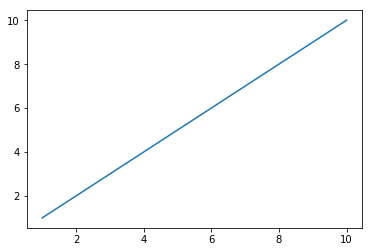

In [2]:
x1 = range(1,11)
y1 = range(1,11)
plt.plot(x1,y1)

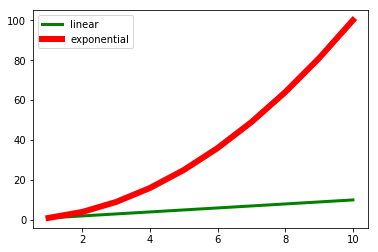

In [3]:
# Square the x values and save them as y2
# I'm using a list comprehension to loop through the numbers in x1, square each, put them back in a list, and save to y2
y2 = [num**2 for num in x1]

y2 = list()
for num in x1:
    y2.append(num**2)

# Plot the x1-y1 relationship from above, with a label for the legend, and a linewidth and different color
plt.plot(x1,y1,label='linear',lw=3,color='g')

# Overlay the x1-y2 relationship, with a label for the legend, and a different linewidth and color
plt.plot(x1,y2,label='exponential',lw=6,color='r')

# Include a legend, the default tries to be smart but usually sucks, so tell it explicity where to go
plt.legend(loc='upper left')

Matplotlib is really powerful but also really cranky, so make liberal use of StackOverflow if you can't get it to do something you want. There's almost always a way, it's just a question of how painful!

# Simple vs. Binary Search redux

Adapted from [Bhargava (2016) Ch. 1](https://learn.colorado.edu/d2l/le/content/190526/viewContent/2876346/View).

Recall the simple versus binary search we discussed on the first day of class. I pick a single number from a range and you have to guess it as quickly as possible with me only telling you "too high" or "too low". 

You don't need to memorize how these functions work, but you should begin to recognize syntax, style, etc. at this point so they're not black boxes anymore. The `linear_seach` function starts at the lowest value and works its way up sequentially while the `binary_search` starts with a guess in the middle and keep guessing halfway up or down.

I have changed the functions slightly from Class 1 to include a "guess_count" variable that keeps track of how many guesses are made until the function makes the right guess. Note that the inner `return` line now returns "guess_count" and the "guess", so we need to catch both of these outputs.

In [4]:
def linear_search(range_size,target):
    range_values = range(int(range_size))
    guess = min(range_values)
    guess_count = 0
    
    while guess < len(range_values):
        #print(guess)
        guess_count += 1
        
        if guess == target:
            return guess_count, guess

        else:
            guess = guess + 1
    
    return guess_count, None

def binary_search(range_size,target):
    range_values = range(int(range_size))
    low = min(range_values)
    high = max(range_values)
    guess_count = 0
    
    while low <= high:
        guess_count += 1
        
        mid = int((low + high)/2)
        guess = range_values[mid]
        #print(guess)
        
        if guess == target:
            return guess_count, mid
        
        if guess > target:
            high = mid - 1
            
        elif guess < target:
            low = mid + 1
            
    return guess_count, None

In [5]:
# Run both functions on the same problem and catch the right answer and the number of guesses for each
linear_guess_count, linear_guess = linear_search(100,99)
binary_guess_count, binary_guess = binary_search(100,99)

# Print out the number of guesses for each
print("Linear search took {0} guesses.".format(linear_guess_count))
print("Binary search took {0} guesses.".format(binary_guess_count))

Linear search took 100 guesses.
Binary search took 7 guesses.


At this point, we care less about whether the functions ultimately guess the number and rather want to compare how long it takes them to do it. For a range of numbers of size 100, in the *worst* case it took linear search 100 guesses and binary search 7 guesses. How would that change if the range was 1,000 or 1,000,000 or 1,000,000,000? This step may take as much as 60 seconds.

In [6]:
# Create different range sizes by powers of 10: 1e0 = 1, 1e1 = 10, 1e2 = 100, etc.
ranges = [1e1,1e2,1e3,1e4,1e5,1e6,1e7,1e8,1e9]

# Create a binary guess counter dictionary 

# The keys are the size of the range and the values are the number of guesses
linear_guess_counter = {}
binary_guess_counter = {}

for range_num in ranges:
    # We already know that the worst case of the linear search is the size of the array, so let's skip running this to save time
    # linear_guess_counter[range_num], binary_guess = linear_search(range_num,range_num-1)
    
    # And just record the number of guesses directly instead
    linear_guess_counter[range_num] = range_num
    
    # But actually do the search
    binary_guess_counter[range_num], binary_guess = binary_search(range_num,range_num-1)

Let's take a peek inside each:

In [7]:
linear_guess_counter

{10.0: 10.0,
 100.0: 100.0,
 1000.0: 1000.0,
 10000.0: 10000.0,
 100000.0: 100000.0,
 1000000.0: 1000000.0,
 10000000.0: 10000000.0,
 100000000.0: 100000000.0,
 1000000000.0: 1000000000.0}

In [8]:
binary_guess_counter

{10.0: 4,
 100.0: 7,
 1000.0: 10,
 10000.0: 14,
 100000.0: 17,
 1000000.0: 20,
 10000000.0: 24,
 100000000.0: 27,
 1000000000.0: 30}

Pretty big difference! Let's plot out these differences.

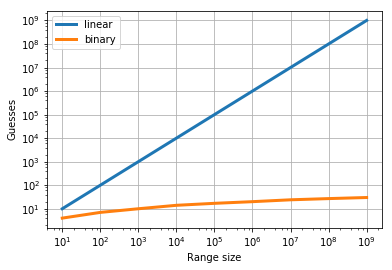

In [9]:
# As an example of matplotlib being finnicky, I'm configuring an empty plotting environment first so I have more control
# Create an empty plot with 1 subplot, we'll use the "ax" object returned by the subplots constructor method for the rest
f,ax = plt.subplots(1,1,sharex=True)

# Set the x and y-axes to be on a logarithmic scale given that we're using exponential data
ax.set_xscale('log')
ax.set_yscale('log')

# Label the x- and y-axes
ax.set_xlabel('Range size')
ax.set_ylabel('Guesses')

# Include a grid
ax.grid(True)

# The keys in the linear_guess_counter dictionary are our x-values and the values are our y-values
# Access them with .keys() and .values() methods, and then make sure they're sorted ascending
x_linear = sorted(linear_guess_counter.keys())
y_linear = sorted(linear_guess_counter.values())

# Same as above
x_binary = sorted(binary_guess_counter.keys())
y_binary = sorted(binary_guess_counter.values())

# Now make the linear plot
ax.plot(x_linear,y_linear,label='linear',lw=3)

# Now make the binary plot
ax.plot(x_binary,y_binary,label='binary',lw=3)

# Include the legend
ax.legend(loc='upper left')

This is visualizes the massive differences in run-times betweek the two approaches to solving this problem. 

The sequential search solution time grows linearly with the size of the input: if you need to search over 10,000 numbers it could take up to 10,000 cycles in the worst case.

The binary search does *much* better by only growing logarithmically with the size of the input: if you need to search over 10,000 numbers it only takes up to 14 cycles in the worst case.

# Big-O notation

The difference between the linear and binary search shows two fundamentally different complexity classes, or ways of relating the amount of time it takes to solve a problem based on the size of the problem space. Computer scientists refer to these with a notation called "Big O" notation that gives you an idea of how fast an algorithm is. 

The `linear_search` function was a $O(N)$ problem because in the worst case it takes the whole length of the input to solve a problem. The `binary_search` function was a $O(log~N)$ problem because in the worst case it takes the logarithm of the size of the input to solve a problem.

There are [many, many, many different complexity classes](https://complexityzoo.uwaterloo.ca/Complexity_Zoo) based on the context of a problem and the specifics of an algorithm. Researching these kinds of complexity classes is a large and active sub-discipline within computer science!

However, there are a few basic classes to keep in mind for our purposes. While designing an algorithm to be O(N) like the linear search may seem like a really bad choice now, it's actually the second-best case of performance we can hope for in many case. In other words, we're going to be dealing with algorithms that have much, much, much worse performance than our `linear_search` function ... and there's often nothing we can do about it!

* $O(1)$ - A constant time algorithm is somewhat unsual in that its performance is always the same, regardless of the size of the input.
* $O(log~N)$ - A logarithmic time algorithm is one of the best cases of performance we can hope for, but relatively rare!
* $O(N)$ - A linear time algorthm seems slow in comparison to logarithmic time, but is super speedy compared to some other complexity classes.
* $O(N~log~N)$ - A log-linear time algorithm that's slower than linear time, but will be our best case for some kinds of problems.
* $O(N^2)$ - A polynomial time ($N^2, N^3, ...$) algorithm is really slow compared to the alternatives above, but is often easy to write and understand.
* $O(2^N)$ - An exponential time algorithm that behaves totally differently from the polynomial time algorithms, often found in network analysis.
* $O(N!)$ - A factorial time algorithm is a worst case: anything you can do to out of this complexity class into another will result in massive speed-ups!

There are some problems, like the [Traveling Salesman Problem](https://en.wikipedia.org/wiki/Travelling_salesman_problem), where the worst case is stuck at $O(N!)$ or $O(2^N)$ and even the cleverest computer scientists have no tricks to speed the worst case up to something like $O(N^2)$. If you [can prove otherwise](https://en.wikipedia.org/wiki/P_versus_NP_problem), you'll become one of the most famous scientists in history.

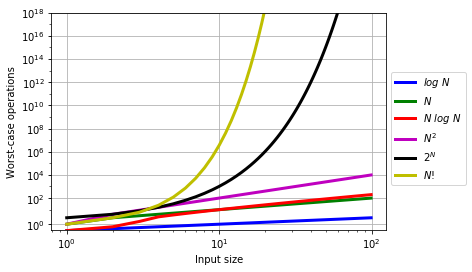

In [10]:
# We're going to import numpy and scipy to help out with the calculations
import numpy as np
from scipy.special import factorial

x = range(1,100)
y_logN = [np.log10(num) for num in x]
y_N = [num for num in x]
y_NlogN = [num*np.log10(num) for num in x]
y_N2 = [num**2 for num in x]
y_2N = [2**num for num in x]
y_Nfact = [factorial(num) for num in x]

# Setup the empty plot
f,ax = plt.subplots(1,1,sharex=True)
ax.set_xscale('log')
ax.set_yscale('symlog')
ax.set_xlabel('Input size')
ax.set_ylabel('Worst-case operations')
ax.set_ylim((1e-1,1e18))
ax.set_yticks(np.logspace(0,18,10))
ax.grid(True)

# Plot all the complexity classes
ax.plot(x,y_logN,color='b',label='$log\ N$',lw=3)
ax.plot(x,y_N,color='g',label='$N$',lw=3)
ax.plot(x,y_NlogN,color='r',label='$N\ log\ N$',lw=3)
ax.plot(x,y_N2,color='m',label='$N^2$',lw=3)
ax.plot(x,y_2N,color='k',label='$2^N$',lw=3)
ax.plot(x,y_Nfact,color='y',label='$N!$',lw=3)

ax.legend(loc='upper left',bbox_to_anchor=(1,.75))

So $O(N!)$ behavior is *pretty* terrible and $O(2^N)$ isn't much better: these are *non-polynomial time* (NP) classes. Let's drop them and see what's left over a bit wider scale of input sizes: these are *polynomial time* (P) classes. $O(log~N)$ still looks righteous compared to $O(N)$ which looks a lot better than $O(N^2)$.

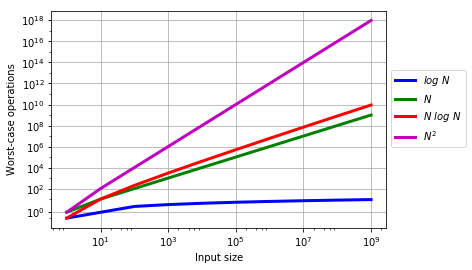

In [11]:
x2 = [1e0,1e1,1e2,1e3,1e4,1e5,1e6,1e7,1e8,1e9]
y2_logN = [np.log10(num) for num in x2]
y2_N = [num for num in x2]
y2_NlogN = [num*np.log10(num) for num in x2]
y2_N2 = [num**2 for num in x2]

# Setup the empty plot
f,ax = plt.subplots(1,1,sharex=True)
ax.set_xscale('log')
ax.set_yscale('symlog')
ax.set_xlabel('Input size')
ax.set_ylabel('Worst-case operations')
ax.set_yticks(np.logspace(0,18,10))
ax.grid(True)

# Plot the non-factorial complexity classes
ax.plot(x2,y2_logN,color='b',label='$log\ N$',lw=3)
ax.plot(x2,y2_N,color='g',label='$N$',lw=3)
ax.plot(x2,y2_NlogN,color='r',label='$N\ log\ N$',lw=3)
ax.plot(x2,y2_N2,color='m',label='$N^2$',lw=3)

ax.legend(loc='upper left',bbox_to_anchor=(1,.75))

$O(N~log~N)$ is worse, but not that much worse than $O(N)$, but has an interesting property right at the at the start: it's actually briefly better than $O(N)$. This is also the case (*very* briefly for $O(N!)$ compared to $O(N^2)$) But even if some complexity classes are better than others for small $N$, most problems are easy with small $N$ anyway, so we ultimately judge algorithms' by their worst case with large $N$. But keep in mind there's lots of terrible classes of performance out there, but if we can convert a $O(N^2)$ or worse to $O(N~log~N)$ or better, we should feel pretty good about ourselves and probably get paid lots and lots of money.

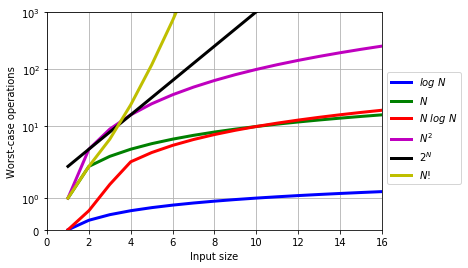

In [12]:
# Setup the empty plot
f,ax = plt.subplots(1,1,sharex=True)
#ax.set_xscale('log')
ax.set_yscale('symlog')
ax.set_xlabel('Input size')
ax.set_ylabel('Worst-case operations')
ax.set_xlim((0,16))
ax.set_ylim((0,1e3))
ax.grid(True)

# Plot all the complexity classes
ax.plot(x,y_logN,color='b',label='$log\ N$',lw=3)
ax.plot(x,y_N,color='g',label='$N$',lw=3)
ax.plot(x,y_NlogN,color='r',label='$N\ log\ N$',lw=3)
ax.plot(x,y_N2,color='m',label='$N^2$',lw=3)
ax.plot(x,y_2N,color='k',label='$2^N$',lw=3)
ax.plot(x,y_Nfact,color='y',label='$N!$',lw=3)

ax.legend(loc='upper left',bbox_to_anchor=(1,.75))

# Asymptotic analysis

Adapted from [Goodrich, Tamassia, & Goldwasser (2013) Ch. 3](https://learn.colorado.edu/d2l/le/content/190526/viewContent/2876341/View) and [MIller & Ranum (2013) Ch. 2](https://learn.colorado.edu/d2l/le/content/190526/viewContent/2876344/View).

Asymptotic analysis, also known as [analysis of algorithms](https://en.wikipedia.org/wiki/Analysis_of_algorithms) is fancy name for translating written code into the Big O notation above. As we saw above some complexity classes completely dominate the performance of others. If your code is mostly linear time, but there's a part that's factorial-time, then you have a bottleneck and everything is going to wait on the factorial-time part to finish. The general idea is to identify the least efficient parts of your code.

Take the example function, `find_max`, below:

* The `biggest = data[0]` is done in constant time (it doesn't matter how big the data list is, taking the first element out should always take the same amount of time): $O(1)$
* The loop `for val in data` iterates through the entire list of data points, meaning the number of operations it needs to take is proportional to the size of the input: $O(N)$
* The `if val > biggest` comparison is comparing two value, so this is also constant time: $O(1)$
* The `biggest = val` reassignment is also constant time: $O(1)$

If we add up $O(1) + O(N) + O(1) + O(1)$, the dominant term is $O(N)$ caused by the loop.

In [ ]:
def find_max(data):
    biggest = data[0]
    for val in data:
        if val > biggest:
            biggest = val
    return biggest

### Comparing anagram solutions

One string is an anagram of another if the second is a rearrangement of the first. For example "heart" and "earth" are anagrams. What are different solutions to trying to checking if two strings (assumed to be of equal length) are anagams?

First, we begin with the Checking Off approach. Loop through all the characters in the first string and loop through all the characters in the second string, we check if the letter from string 1 is also a letter in string 2 and if it is, add the letter from string 2 to the "matching_letters" list, and finally check if the length of the matching string letters is the same length as the length of string 1.

In [ ]:
def anagram1(s1,s2):
    matching_letters = [0]*len(s1)
    
    for pos_in_s1, letter_in_s1 in enumerate(s1):
        for pos_in_s2, letter_in_s2 in enumerate(s2):
            if letter_in_s1 == letter_in_s2 and matching_letters[pos_in_s2] != 1:
                print(letter_in_s1,letter_in_s2,matching_letters)
                matching_letters[pos_in_s2] = 1
    
    if sum(matching_letters) == len(s1):
        return True
    else:
        return False

In [ ]:
def anagram1(s1,s2):
    # Convert s2 into a list to do item assignment
    a_list = list(s2)
    # Start the loop at position 0 in s1
    pos_s1 = 0
    # Assume it's an anagram until you find that it isn't
    is_anagram1 = True
    
    # Loop over each letter in s1 as long as we still think it's an anagram
    while pos_s1 < len(s1) and is_anagram1:
        # Start the next loop at position 0 in s2
        pos_s2 = 0
        # Assume we haven't seen an anagram until we know we have
        is_anagram2 = False
        
        # Start another loop over each letter in s2 as long as we still think it's an anagram
        while pos_s2 < len(a_list) and not is_anagram2:
            # Finally do the comparison to check if the letter from s1 is also a letter in s2
            if s1[pos_s1] == a_list[pos_s2]:
                # If it's not, we don't have an anagram
                is_anagram2 = True
            else:
                # Otherwise go to the next letter in s2 in the loop
                pos_s2 += 1
        
        # If we've gone through the entire s2 comparing to the the letter in s1
        # And we haven't disproved it being an anagram so far, 
        if is_anagram2:
            # "check" the letter off so we don't double count
            a_list[pos_s2] = None
        else:
             # Otherwise pass the false is_anagram2 up to the first loop and tell it to stop too
            is_anagram1 = False
            
        
        # Continue on to the next letter in s1
        pos_s1 += 1
    
    # If we've gone through every letter in s1 and compared it against s2 
    # and there's still no evidence it's not an anagram, it's an anagram
    
    return is_anagram1

In [ ]:
# Test to make sure it works
print(anagram1('heart','earth'))
print(anagram1('boat','rock'))
print(anagram1('off','foo'))
print(anagram1('interrogatives','reinvestigator'))
print(anagram1('conversationalists','conservationalists'))

The function `anagram1` loops through each letter in s2 *every time* it goes through another letter of s1. We know loops are expensive, but loops within loops are even more expensive: $O(N) * O(N) = O(N^2)$.

Another strategy we could adopt is to sort the letters alphabetically and check if they're all there in both. This might save us from doing those loops.

In [ ]:
# A reminder that a string is a special kind of list and that many list functions work on strings, including sort!
# An example of how sorting on a string return a 
sorted('heart')

In [ ]:
def anagram2(s1,s2):
    # Sort all the letters in s1 and s2 alphabetically
    sorted_s1 = sorted(s1)
    sorted_s2 = sorted(s2)
    # Assume we're in an anagram
    is_anagram = True
    
    # Loop through each position in the equal-sized sorted lists
    for pos in range(len(s1)):
        
        # Check if the alphabetically-sorted letters are the same in each positions
        if sorted_s1[pos] != sorted_s2[pos]:
            
            # Only if they're not do we change is_anagram
            is_anagram = False
            # Stop looping once you find evidence of non-anagram
            break
            
    # Return whatever the state of our anagrams is
    return is_anagram

In [ ]:
# Test to make sure it works
print(anagram2('heart','earth'))
print(anagram2('boat','rock'))
print(anagram2('off','foo'))
print(anagram2('interrogatives','reinvestigator'))
print(anagram2('conversationalists','conservationalists'))

The function `anagram2` replaces the double loop with a single loop, so we avoid the worst-case scenario of $O(N^2)$ and hopefully get $O(N)$. But as we'll learn in a few weeks, those sorting algorithms carry a cost of $O(N^2)$ in the worst case and $O(N~log~N)$ in the best case. Because $O(N~log~N)$ (from the sorting algorithms) dominates $O(N)$ (from the loop), this function only gets us to $O(N~log~N)$ in the best case, which is still an improvement from $O(N^2)$!

Let's try a "brute force" solution where we generate a list of all possible strings from s1 and t hen see if s2 occurs. This is also the "thousands of monkeys on thousands of typewriters" approach to producing Shakespeare.

In [ ]:
# We'll use an already-existing tool to generate permutations
from itertools import permutations

# See how the string "ABC" has 6 permutations of its letters
list(permutations('ABC',3))

In [ ]:
# We want to convert each of these permutation tuples back into a string by joining each element by nothing
''.join(('A', 'B', 'C'))

These kinds of combinatorics (a string of length 3 generating 6 unique permutations!) are where the expensive factorials come in! Longer words would need to go through a lot of possible permutations!

In [ ]:
def anagram3(s1,s2):
    # Assume we don't have any anagrams
    is_anagram = False
    # Loop through every permutation of the string that is the same size as the string
    for permutation in permutations(s1,len(s1)):
        
        # The permutation returns a list of strings, "stringify" it back to a string
        stringified = ''.join(permutation)
        # If we find a permutation of s1 that is the same as s2, then it's an anagram
        if stringified == s2:
            is_anagram = True
            
    # Return whether we found an anagram 
    return is_anagram

In [ ]:
# Test to make sure it works
print(anagram3('heart','earth'))
print(anagram3('boat','rock'))
print(anagram3('off','foo'))

# You *really* don't want to test these out by uncommenting them
#print(anagram3('interrogatives','reinvestigator'))
#print(anagram3('conversationalists','conservationalists'))

We can actually make this an $O(N)$ problem if we're really clever. The `ord` function returns an integer "code point" for where the character appears, almost like a dictionary where the key is a letter and the value is its position in a really big alphabet. If we subtract it from where A appears, then we know the "letter distance" are between the letter and A.

In [ ]:
print(ord('a'), ord('b'), ord('y'), ord('z'))

# A is the 1st letter starting at A
print(ord('a') - ord('a'))

In [ ]:
def anagram4(s1,s2):
    # Create two storage containers that will count how often a letter appears
    code_s1 = [0]*26
    code_s2 = [0]*26
    
    # Loop through each letter in s1
    for s1_letter in s1:
        # Count how many letter away this letter is from A
        ord_s1 = ord(s1_letter) - ord('a')
        # Increment the storage container at the location of the letter by 1
        code_s1[ord_s1] += 1
    
    # Do the same for s2
    for s2_letter in s2:
        ord_s2 = ord(s2_letter) - ord('a')
        code_s2[ord_s2] += 1
    
    # Check if the storage containers are the same
    if code_s1 == code_s2:
        return True
    else:
        return False

In [ ]:
# Test to make sure it works
print(anagram4('heart','earth'))
print(anagram4('boat','rock'))
print(anagram4('off','foo'))
print(anagram4('interrogatives','reinvestigator'))
print(anagram4('conversationalists','conservationalists'))

If you don't like indexing with lists, you could also do a similar approach using dictionaries keyed by letter with values being the count of the number of letters. First we can create a dictionary of letters as keys with values as 0 by using the `zip` function.

In [ ]:
import string

dict(zip(string.ascii_lowercase,[0]*26))

In [ ]:
def anagram4_1(s1,s2):
    # Create two storage containers that will count how often a letter appears
    code_s1 = dict(zip(string.ascii_lowercase,[0]*26))
    code_s2 = dict(zip(string.ascii_lowercase,[0]*26))
    
    # Loop through each letter in s1
    for s1_letter in s1:
        # Increment the storage container at the location of the letter by 1
        code_s1[s1_letter] += 1
    
    # Do the same for s2
    for s2_letter in s2:
        code_s2[s2_letter] += 1
    
    # Check if the storage containers are the same
    if code_s1 == code_s2:
        return True
    else:
        return False

In [ ]:
# Test to make sure it works
print(anagram4_1('heart','earth'))
print(anagram4_1('boat','rock'))
print(anagram4_1('off','foo'))
print(anagram4_1('interrogatives','reinvestigator'))
print(anagram4_1('conversationalists','conservationalists'))